## Best Football Player in the World! [2016-2020]

### The top players selected for analysis are those who are featured for all 5 years [2016-2020]. The winner will be decided on six categories:
1. Goals Scored
2. Minutes Per On Target Shot
3. Minutes Per Goal
4. Goals-xG Score
5. Target Accuracy
6. Shots on Goal

In [1]:
import webbrowser
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
from tabulate import tabulate
import xgboost as xgb
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as sm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("Football_Data.csv")
df.head()

Country   League   Club       Player Names  Matches_Played  Substitution  \
0   Spain  La Liga  (BET)    Juanmi Callejon              19            16   
1   Spain  La Liga  (BAR)  Antoine Griezmann              36             0   
2   Spain  La Liga  (ATL)        Luis Suarez              34             1   
3   Spain  La Liga  (CAR)       Ruben Castro              32             3   
4   Spain  La Liga  (VAL)      Kevin Gameiro              21            10   

   Mins  Goals     xG  xG Per Avg Match  Shots  OnTarget  Shots Per Avg Match  \
0  1849   11.0   6.62              0.34     48        20                 2.47   
1  3129   16.0  11.86              0.36     88        41                 2.67   
2  2940   28.0  23.21              0.75    120        57                 3.88   
3  2842   13.0  14.06              0.47    117        42                 3.91   
4  1745   13.0  10.65              0.58     50        23                 2.72   

   On Target Per Avg Match  Year  
0                     1.03  2016  
1                     1.24  2016  
2                     1.84  2016  
3                     1.40  2016  
4                     1.25  2016

In [3]:
df.shape

(660, 15)

* Above column shows that our dataset has 15 columns and 660 rows.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  660 non-null    object 
 1   League                   660 non-null    object 
 2   Club                     660 non-null    object 
 3   Player Names             660 non-null    object 
 4   Matches_Played           660 non-null    int64  
 5   Substitution             660 non-null    int64  
 6   Mins                     660 non-null    int64  
 7   Goals                    500 non-null    float64
 8   xG                       660 non-null    float64
 9   xG Per Avg Match         660 non-null    float64
 10  Shots                    660 non-null    int64  
 11  OnTarget                 660 non-null    int64  
 12  Shots Per Avg Match      660 non-null    float64
 13  On Target Per Avg Match  660 non-null    float64
 14  Year                     6

In [5]:
df.describe()

Matches_Played  Substitution         Mins       Goals          xG  \
count      660.000000    660.000000   660.000000  500.000000  660.000000   
mean        22.371212      3.224242  2071.416667   13.382000   10.089606   
std          9.754658      3.839498   900.595049    5.808231    5.724844   
min          2.000000      0.000000   264.000000    2.000000    0.710000   
25%         14.000000      0.000000  1363.500000   10.000000    6.100000   
50%         24.000000      2.000000  2245.500000   12.000000    9.285000   
75%         31.000000      5.000000  2822.000000   16.000000   13.252500   
max         38.000000     26.000000  4177.000000   37.000000   32.540000   

       xG Per Avg Match       Shots    OnTarget  Shots Per Avg Match  \
count        660.000000  660.000000  660.000000           660.000000   
mean           0.476167   64.177273   28.365152             2.948015   
std            0.192831   34.941622   16.363149             0.914906   
min            0.070000    5.000000    2.000000             0.800000   
25%            0.340000   37.750000   17.000000             2.335000   
50%            0.435000   62.000000   26.000000             2.845000   
75%            0.570000   86.000000   37.000000             3.382500   
max            1.350000  208.000000  102.000000             7.200000   

       On Target Per Avg Match         Year  
count               660.000000   660.000000  
mean                  1.315652  2018.363636  
std                   0.474239     1.367700  
min                   0.240000  2016.000000  
25%                   0.980000  2017.000000  
50%                   1.250000  2019.000000  
75%                   1.540000  2019.000000  
max                   3.630000  2020.000000

In [6]:
lst=[]
lst.append((df.isnull().sum()/float(len(df)))*100)
print(lst)

[Country                     0.000000
League                      0.000000
Club                        0.000000
Player Names                0.000000
Matches_Played              0.000000
Substitution                0.000000
Mins                        0.000000
Goals                      24.242424
xG                          0.000000
xG Per Avg Match            0.000000
Shots                       0.000000
OnTarget                    0.000000
Shots Per Avg Match         0.000000
On Target Per Avg Match     0.000000
Year                        0.000000
dtype: float64]


* The above data shows that there is no null data in our dataframe.

In [7]:
df.drop(df[df["Player Names"]=="Everton"].index,axis=0,inplace=True)

In [8]:
# profile = pp.ProfileReport(df)
# profile.to_file("output.html")

* Forming ProfileReport and save as output.html file

## Data Cleaning

In [9]:
df.columns

Index(['Country', 'League', 'Club', 'Player Names', 'Matches_Played',
       'Substitution', 'Mins', 'Goals', 'xG', 'xG Per Avg Match', 'Shots',
       'OnTarget', 'Shots Per Avg Match', 'On Target Per Avg Match', 'Year'],
      dtype='object')

In [10]:
df.head()

Country   League   Club       Player Names  Matches_Played  Substitution  \
0   Spain  La Liga  (BET)    Juanmi Callejon              19            16   
1   Spain  La Liga  (BAR)  Antoine Griezmann              36             0   
2   Spain  La Liga  (ATL)        Luis Suarez              34             1   
3   Spain  La Liga  (CAR)       Ruben Castro              32             3   
4   Spain  La Liga  (VAL)      Kevin Gameiro              21            10   

   Mins  Goals     xG  xG Per Avg Match  Shots  OnTarget  Shots Per Avg Match  \
0  1849   11.0   6.62              0.34     48        20                 2.47   
1  3129   16.0  11.86              0.36     88        41                 2.67   
2  2940   28.0  23.21              0.75    120        57                 3.88   
3  2842   13.0  14.06              0.47    117        42                 3.91   
4  1745   13.0  10.65              0.58     50        23                 2.72   

   On Target Per Avg Match  Year  
0                     1.03  2016  
1                     1.24  2016  
2                     1.84  2016  
3                     1.40  2016  
4                     1.25  2016

### Display the Null values percentage against every columns (compare to the total number of records)

In [11]:
(df.isnull().mean())*100

Country                     0.000000
League                      0.000000
Club                        0.000000
Player Names                0.000000
Matches_Played              0.000000
Substitution                0.000000
Mins                        0.000000
Goals                      24.390244
xG                          0.000000
xG Per Avg Match            0.000000
Shots                       0.000000
OnTarget                    0.000000
Shots Per Avg Match         0.000000
On Target Per Avg Match     0.000000
Year                        0.000000
dtype: float64

### Display the Number of Duplicate Rows

In [12]:
len(df[df.duplicated(keep=False)])

0

### Find out the total count of null values in each columns

In [13]:
df.isnull().sum()

Country                      0
League                       0
Club                         0
Player Names                 0
Matches_Played               0
Substitution                 0
Mins                         0
Goals                      160
xG                           0
xG Per Avg Match             0
Shots                        0
OnTarget                     0
Shots Per Avg Match          0
On Target Per Avg Match      0
Year                         0
dtype: int64

### 1. Players Name
* Drop players with missing data.

In [14]:
x=[]
def count(data):
    x = df.groupby(['Player Names'])['Goals'].count().reset_index()
    x.rename(columns={'Goals':'Stats_Frequency'},inplace=True)
    return x

In [15]:
Player_count=count(df)
Player_count

Player Names  Stats_Frequency
0          Abdou Harroui                1
1           Adrien Hunou                1
2       Adrien Thomasson                1
3                 Aduriz                1
4          Alassane Plea                2
..                   ...              ...
434     Yeferson Soteldo                1
435  Youssef   En-Nesyri                0
436       Yussuf Poulsen                1
437   Zlatan Ibrahimovic                2
438       Ángel Di Maria                1

[439 rows x 2 columns]

In [16]:
df=pd.merge(df,Player_count,how='left',on='Player Names')

In [17]:
df.drop(df[df['Stats_Frequency'] < 3].index, inplace = True)
df.reset_index(drop=True,inplace=True)
df

Country          League   Club       Player Names  Matches_Played  \
0      Spain         La Liga  (BAR)  Antoine Griezmann              36   
1      Spain         La Liga  (ATL)        Luis Suarez              34   
2      Spain         La Liga  (JUV)  Cristiano Ronaldo              29   
3      Spain         La Liga  (RMA)      Karim Benzema              23   
4      Spain         La Liga  (PSG)             Neymar              30   
..       ...             ...    ...                ...             ...   
137  England  Premier League  (LIV)      Mohamed Salah               9   
138  England  Premier League  (LEI)        Jamie Vardy               8   
139  England  Premier League  (TOT)         Harry Kane              10   
140  England  Premier League  (LIV)         Sadio Mane               8   
141  England  Premier League  (TOT)      Son Heung-Min              10   

     Substitution  Mins  Goals     xG  xG Per Avg Match  Shots  OnTarget  \
0               0  3129   16.0  11.86              0.36     88        41   
1               1  2940   28.0  23.21              0.75    120        57   
2               0  2634   25.0  24.68              0.89    162        60   
3               6  1967   11.0  13.25              0.64     69        34   
4               0  2694   13.0  13.33              0.47    105        42   
..            ...   ...    ...    ...               ...    ...       ...   
137             0   831    NaN   6.12              0.70     35        15   
138             1   780    NaN   8.70              1.06     21        15   
139             0   956    NaN   6.64              0.66     39        15   
140             1   785    NaN   4.88              0.59     27        13   
141             0   861    NaN   3.90              0.43     20        12   

     Shots Per Avg Match  On Target Per Avg Match  Year  Stats_Frequency  
0                   2.67                     1.24  2016                3  
1                   3.88                     1.84  2016                4  
2                   5.84                     2.16  2016                4  
3                   3.33                     1.64  2016                3  
4                   3.70                     1.48  2016                3  
..                   ...                      ...   ...              ...  
137                 4.00                     1.71  2020                3  
138                 2.56                     1.83  2020                3  
139                 3.88                     1.49  2020                3  
140                 3.27                     1.57  2020                3  
141                 2.21                     1.32  2020                3  

[142 rows x 16 columns]

In [18]:
df.shape

(142, 16)

## Splitting the Dataset

In [19]:
list(df.columns[df.isnull().any()])

['Goals']

### Find out the number of null values from the column that you got from the above code

In [20]:
df['Goals'].isnull().sum()

24

### On basis of the above column we are spliting data into dataset
* First dataframe (refer that as traindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset )
* Second dataframe (refer that as testdata) that contains the columns, that have Null data in that column ( This is going to be our test dataset )

In [21]:
traindata = df[df['Goals'].notnull()]

In [22]:
testdata = df[df['Goals'].isnull()]

If clear_data has a null value, we are storing it in nulldata, otherwise in maindata.

### Check the number of Rows and Columns for both the dataframes

In [23]:
traindata.shape,testdata.shape

((118, 16), (24, 16))

In [24]:
traindata.head()

Country   League   Club       Player Names  Matches_Played  Substitution  \
0   Spain  La Liga  (BAR)  Antoine Griezmann              36             0   
1   Spain  La Liga  (ATL)        Luis Suarez              34             1   
2   Spain  La Liga  (JUV)  Cristiano Ronaldo              29             0   
3   Spain  La Liga  (RMA)      Karim Benzema              23             6   
4   Spain  La Liga  (PSG)             Neymar              30             0   

   Mins  Goals     xG  xG Per Avg Match  Shots  OnTarget  Shots Per Avg Match  \
0  3129   16.0  11.86              0.36     88        41                 2.67   
1  2940   28.0  23.21              0.75    120        57                 3.88   
2  2634   25.0  24.68              0.89    162        60                 5.84   
3  1967   11.0  13.25              0.64     69        34                 3.33   
4  2694   13.0  13.33              0.47    105        42                 3.70   

   On Target Per Avg Match  Year  Stats_Frequency  
0                     1.24  2016                3  
1                     1.84  2016                4  
2                     2.16  2016                4  
3                     1.64  2016                3  
4                     1.48  2016                3

In [25]:
testdata.head()

Country   League   Club       Player Names  Matches_Played  Substitution  \
118   Spain  La Liga  (RMA)      Karim Benzema               8             0   
119   Spain  La Liga  (SOC)    Mikel Oyarzabal               9             2   
120   Spain  La Liga  (BAR)       Lionel Messi               8             1   
121   Spain  La Liga  (ATL)        Luis Suarez               5             1   
122   Spain  La Liga  (BAR)  Antoine Griezmann               8             1   

     Mins  Goals    xG  xG Per Avg Match  Shots  OnTarget  \
118   741    NaN  4.91              0.63     27        12   
119   736    NaN  6.82              0.88     31        16   
120   824    NaN  5.46              0.63     39        19   
121   387    NaN  3.30              0.81     22         8   
122   634    NaN  3.67              0.55     18         8   

     Shots Per Avg Match  On Target Per Avg Match  Year  Stats_Frequency  
118                 3.46                     1.54  2020                3  
119                 4.00                     2.07  2020                3  
120                 4.50                     2.19  2020                4  
121                 5.40                     1.96  2020                4  
122                 2.70                     1.20  2020                3

In [26]:
cvdata = traindata[traindata['Year']==2019]
traindata = traindata[traindata['Year']!=2019]

In [27]:
traindata.head()

Country   League   Club       Player Names  Matches_Played  Substitution  \
0   Spain  La Liga  (BAR)  Antoine Griezmann              36             0   
1   Spain  La Liga  (ATL)        Luis Suarez              34             1   
2   Spain  La Liga  (JUV)  Cristiano Ronaldo              29             0   
3   Spain  La Liga  (RMA)      Karim Benzema              23             6   
4   Spain  La Liga  (PSG)             Neymar              30             0   

   Mins  Goals     xG  xG Per Avg Match  Shots  OnTarget  Shots Per Avg Match  \
0  3129   16.0  11.86              0.36     88        41                 2.67   
1  2940   28.0  23.21              0.75    120        57                 3.88   
2  2634   25.0  24.68              0.89    162        60                 5.84   
3  1967   11.0  13.25              0.64     69        34                 3.33   
4  2694   13.0  13.33              0.47    105        42                 3.70   

   On Target Per Avg Match  Year  Stats_Frequency  
0                     1.24  2016                3  
1                     1.84  2016                4  
2                     2.16  2016                4  
3                     1.64  2016                3  
4                     1.48  2016                3

In [28]:
cvdata.head()

Country   League   Club     Player Names  Matches_Played  Substitution  \
86   Spain  La Liga  (ATL)      Luis Suarez              22             6   
87   Spain  La Liga  (RMA)    Karim Benzema              36             1   
88   Spain  La Liga  (SOC)  Mikel Oyarzabal              36             1   
89   Spain  La Liga  (SOC)     Willian Jose              24            13   
90   Spain  La Liga  (VIL)    Gerard Moreno              33             2   

    Mins  Goals     xG  xG Per Avg Match  Shots  OnTarget  \
86  2126   16.0  14.32              0.64     79        42   
87  3207   21.0  21.61              0.64    124        59   
88  3247   10.0   8.89              0.26     62        22   
89  2171   11.0  13.03              0.57     59        19   
90  2831   18.0  16.09              0.54     89        34   

    Shots Per Avg Match  On Target Per Avg Match  Year  Stats_Frequency  
86                 3.53                     1.88  2019                4  
87                 3.67                     1.75  2019                3  
88                 1.81                     0.64  2019                3  
89                 2.58                     0.83  2019                3  
90                 2.99                     1.14  2019                3

## Splitting of Train and the Test Data
### You need to split the "traindata" columns into x and y dataframe
* y should have the target column i.e. "Goals" and the other column should be in x
* x is going to hold the source fields and y will be going to hold the target fields

In [29]:
x_train = traindata.drop("Goals",axis=1)
x_train.head()

Country   League   Club       Player Names  Matches_Played  Substitution  \
0   Spain  La Liga  (BAR)  Antoine Griezmann              36             0   
1   Spain  La Liga  (ATL)        Luis Suarez              34             1   
2   Spain  La Liga  (JUV)  Cristiano Ronaldo              29             0   
3   Spain  La Liga  (RMA)      Karim Benzema              23             6   
4   Spain  La Liga  (PSG)             Neymar              30             0   

   Mins     xG  xG Per Avg Match  Shots  OnTarget  Shots Per Avg Match  \
0  3129  11.86              0.36     88        41                 2.67   
1  2940  23.21              0.75    120        57                 3.88   
2  2634  24.68              0.89    162        60                 5.84   
3  1967  13.25              0.64     69        34                 3.33   
4  2694  13.33              0.47    105        42                 3.70   

   On Target Per Avg Match  Year  Stats_Frequency  
0                     1.24  2016                3  
1                     1.84  2016                4  
2                     2.16  2016                4  
3                     1.64  2016                3  
4                     1.48  2016                3

In [30]:
y_train = traindata[['Goals']]
y_train.head()

Goals
0   16.0
1   28.0
2   25.0
3   11.0
4   13.0

In [31]:
x_train.shape,y_train.shape

((86, 15), (86, 1))

In [32]:
x_cv = cvdata.drop("Goals",axis=1)
x_cv.head()

Country   League   Club     Player Names  Matches_Played  Substitution  \
86   Spain  La Liga  (ATL)      Luis Suarez              22             6   
87   Spain  La Liga  (RMA)    Karim Benzema              36             1   
88   Spain  La Liga  (SOC)  Mikel Oyarzabal              36             1   
89   Spain  La Liga  (SOC)     Willian Jose              24            13   
90   Spain  La Liga  (VIL)    Gerard Moreno              33             2   

    Mins     xG  xG Per Avg Match  Shots  OnTarget  Shots Per Avg Match  \
86  2126  14.32              0.64     79        42                 3.53   
87  3207  21.61              0.64    124        59                 3.67   
88  3247   8.89              0.26     62        22                 1.81   
89  2171  13.03              0.57     59        19                 2.58   
90  2831  16.09              0.54     89        34                 2.99   

    On Target Per Avg Match  Year  Stats_Frequency  
86                     1.88  2019                4  
87                     1.75  2019                3  
88                     0.64  2019                3  
89                     0.83  2019                3  
90                     1.14  2019                3

In [33]:
y_cv = cvdata[['Goals']]
y_cv.head()

Goals
86   16.0
87   21.0
88   10.0
89   11.0
90   18.0

In [34]:
x_cv.shape,y_cv.shape

((32, 15), (32, 1))

In [35]:
x_test = testdata.drop("Goals",axis=1)
x_test.head()

Country   League   Club       Player Names  Matches_Played  Substitution  \
118   Spain  La Liga  (RMA)      Karim Benzema               8             0   
119   Spain  La Liga  (SOC)    Mikel Oyarzabal               9             2   
120   Spain  La Liga  (BAR)       Lionel Messi               8             1   
121   Spain  La Liga  (ATL)        Luis Suarez               5             1   
122   Spain  La Liga  (BAR)  Antoine Griezmann               8             1   

     Mins    xG  xG Per Avg Match  Shots  OnTarget  Shots Per Avg Match  \
118   741  4.91              0.63     27        12                 3.46   
119   736  6.82              0.88     31        16                 4.00   
120   824  5.46              0.63     39        19                 4.50   
121   387  3.30              0.81     22         8                 5.40   
122   634  3.67              0.55     18         8                 2.70   

     On Target Per Avg Match  Year  Stats_Frequency  
118                     1.54  2020                3  
119                     2.07  2020                3  
120                     2.19  2020                4  
121                     1.96  2020                4  
122                     1.20  2020                3

In [36]:
y_test = testdata[['Goals']]
y_test.head()

Goals
118    NaN
119    NaN
120    NaN
121    NaN
122    NaN

In [37]:
x_test.shape,y_test.shape

((24, 15), (24, 1))

## Feature Engineering

### 1. Target Accuracy per Game

In [38]:
x_train["Target_Accuracy_Per_Game"] = (x_train['On Target Per Avg Match']/x_train['Shots Per Avg Match'])*100
x_test["Target_Accuracy_Per_Game"] = (x_test['On Target Per Avg Match']/x_test['Shots Per Avg Match'])*100
x_cv["Target_Accuracy_Per_Game"] = (x_cv['On Target Per Avg Match']/x_cv['Shots Per Avg Match'])*100
traindata["Target_Accuracy_Per_Game"] = (traindata['On Target Per Avg Match']/traindata['Shots Per Avg Match'])*100
cvdata["Target_Accuracy_Per_Game"] = (cvdata['On Target Per Avg Match']/cvdata['Shots Per Avg Match'])*100
x_train[["Player Names","Target_Accuracy_Per_Game"]].head()

Player Names  Target_Accuracy_Per_Game
0  Antoine Griezmann                 46.441948
1        Luis Suarez                 47.422680
2  Cristiano Ronaldo                 36.986301
3      Karim Benzema                 49.249249
4             Neymar                 40.000000

### 2. Minutes per On Target Shot

In [39]:
x_train["Minutes_Per_On_Target"] = (x_train['Mins']/x_train['OnTarget'])
x_test["Minutes_Per_On_Target"] = (x_test['Mins']/x_test['OnTarget'])
x_cv["Minutes_Per_On_Target"] = (x_cv['Mins']/x_cv['OnTarget'])
traindata["Minutes_Per_On_Target"] = (traindata['Mins']/traindata['OnTarget'])
cvdata["Minutes_Per_On_Target"] = (cvdata['Mins']/cvdata['OnTarget'])
x_train[["Player Names","Minutes_Per_On_Target"]].head()

Player Names  Minutes_Per_On_Target
0  Antoine Griezmann              76.317073
1        Luis Suarez              51.578947
2  Cristiano Ronaldo              43.900000
3      Karim Benzema              57.852941
4             Neymar              64.142857

### 3. Difference between goals scored and expected goals scored


In [40]:
df["GoalDifference"] = (df['Goals']-df['xG'])
df[["Player Names","GoalDifference"]].head()

Player Names  GoalDifference
0  Antoine Griezmann            4.14
1        Luis Suarez            4.79
2  Cristiano Ronaldo            0.32
3      Karim Benzema           -2.25
4             Neymar           -0.33

### 4. Shots to Goal Conversion

In [41]:
df["Shots_to_Goal"] = (df['Shots']/df['Goals'])
df[["Player Names","Shots_to_Goal"]].head()

Player Names  Shots_to_Goal
0  Antoine Griezmann       5.500000
1        Luis Suarez       4.285714
2  Cristiano Ronaldo       6.480000
3      Karim Benzema       6.272727
4             Neymar       8.076923

### 5. Minutes per Matches Played

In [42]:
x_train["Minutes_per_match"] = (x_train['Mins']/x_train['Matches_Played'])
x_test["Minutes_per_match"] = (x_test['Mins']/x_test['Matches_Played'])
x_cv["Minutes_per_match"] = (x_cv['Mins']/x_cv['Matches_Played'])
traindata["Minutes_per_match"] = (traindata['Mins']/traindata['Matches_Played'])
cvdata["Minutes_per_match"] = (cvdata['Mins']/cvdata['Matches_Played'])
x_train[["Player Names","Minutes_per_match"]].head()

Player Names  Minutes_per_match
0  Antoine Griezmann          86.916667
1        Luis Suarez          86.470588
2  Cristiano Ronaldo          90.827586
3      Karim Benzema          85.521739
4             Neymar          89.800000

### 6. Minutes per Goal

In [43]:
traindata["Minutes_per_goal"] = (traindata['Mins']/traindata['Goals'])
cvdata["Minutes_per_goal"] = (cvdata['Mins']/cvdata['Goals'])
traindata[["Player Names","Minutes_per_goal"]].head()

Player Names  Minutes_per_goal
0  Antoine Griezmann        195.562500
1        Luis Suarez        105.000000
2  Cristiano Ronaldo        105.360000
3      Karim Benzema        178.818182
4             Neymar        207.230769

In [44]:
Traindata=traindata.copy()
X_test=x_test.copy()
X_cv=x_cv.copy()

### 7. Label Encoding 

In [45]:
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

In [46]:
label_encoder = EncoderExt()
label_encoder.fit(x_train['Player Names'])

#### 1. Player Names

In [47]:
x_train['Player Names']=label_encoder.transform(x_train['Player Names'])
x_cv['Player Names']=label_encoder.transform(x_cv['Player Names'])
x_test['Player Names']=label_encoder.transform(x_test['Player Names'])
traindata['Player Names']=label_encoder.transform(traindata['Player Names'])

#### 2. Country

In [48]:
x_train['Country']=label_encoder.transform(x_train['Country'])
x_cv['Country']=label_encoder.transform(x_cv['Country'])
x_test['Country']=label_encoder.transform(x_test['Country'])

#### 3. League

In [49]:
x_train['League']=label_encoder.transform(x_train['League'])
x_cv['League']=label_encoder.transform(x_cv['League'])
x_test['League']=label_encoder.transform(x_test['League'])

#### 4. Club

In [50]:
x_train['Club']=label_encoder.transform(x_train['Club'])
x_cv['Club']=label_encoder.transform(x_cv['Club'])
x_test['Club']=label_encoder.transform(x_test['Club'])

## Display Training Data

In [51]:
Traindata

Country                         League   Club               Player Names  \
0     Spain                        La Liga  (BAR)          Antoine Griezmann   
1     Spain                        La Liga  (ATL)                Luis Suarez   
2     Spain                        La Liga  (JUV)          Cristiano Ronaldo   
3     Spain                        La Liga  (RMA)              Karim Benzema   
4     Spain                        La Liga  (PSG)                     Neymar   
..      ...                            ...    ...                        ...   
81  England                 Premier League  (TOT)                 Harry Kane   
82  England                 Premier League  (MNC)              Sergio Aguero   
83  England                 Premier League  (ARS)  Pierre-Emerick Aubameyang   
84  England                 Premier League  (LEI)                Jamie Vardy   
85   Brazil  Campeonato Brasileiro Série A  (GRE)                Diego Souza   

    Matches_Played  Substitution  Mins  Goals     xG  xG Per Avg Match  Shots  \
0               36             0  3129   16.0  11.86              0.36     88   
1               34             1  2940   28.0  23.21              0.75    120   
2               29             0  2634   25.0  24.68              0.89    162   
3               23             6  1967   11.0  13.25              0.64     69   
4               30             0  2694   13.0  13.33              0.47    105   
..             ...           ...   ...    ...    ...               ...    ...   
81              27             1  2580   17.0  15.48              0.57    102   
82              31             2  2566   21.0  19.45              0.72    118   
83              30             6  2905   22.0  21.71              0.71     94   
84              30             4  2886   18.0  17.62              0.58     79   
85              32             0  4177   11.0  11.43              0.26     51   

    OnTarget  Shots Per Avg Match  On Target Per Avg Match  Year  \
0         41                 2.67                     1.24  2016   
1         57                 3.88                     1.84  2016   
2         60                 5.84                     2.16  2016   
3         34                 3.33                     1.64  2016   
4         42                 3.70                     1.48  2016   
..       ...                  ...                      ...   ...   
81        46                 3.76                     1.69  2018   
82        43                 4.37                     1.59  2018   
83        39                 3.07                     1.28  2018   
84        38                 2.60                     1.25  2018   
85        21                 1.16                     0.48  2018   

    Stats_Frequency  Target_Accuracy_Per_Game  Minutes_Per_On_Target  \
0                 3                 46.441948              76.317073   
1                 4                 47.422680              51.578947   
2                 4                 36.986301              43.900000   
3                 3                 49.249249              57.852941   
4                 3                 40.000000              64.142857   
..              ...                       ...                    ...   
81                3                 44.946809              56.086957   
82                3                 36.384439              59.674419   
83                4                 41.693811              74.487179   
84                3                 48.076923              75.947368   
85                3                 41.379310             198.904762   

    Minutes_per_match  Minutes_per_goal  
0           86.916667        195.562500  
1           86.470588        105.000000  
2           90.827586        105.360000  
3           85.521739        178.818182  
4           89.800000        207.230769  
..                ...               ...  
81          95.555556        151.764706  
82          82.774194        122.190476  
83        

## Exploratory Data Analysis (EDA)

### 1. Goals vs Match Played

In [52]:
fig = px.histogram(Traindata, x="Matches_Played", y="Goals", color="Player Names")
fig.show()

### 2. Total Goals Scored

In [53]:
fig = px.bar(Traindata, x='Goals', y='Player Names')
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(5,26,56)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()

### 3. Total Minutes Played

In [54]:
fig = go.Figure(go.Bar(
            x=Traindata['Mins'],
            y=Traindata['Player Names'],
            marker=dict(color = [10*i for i in range(1,len(Traindata['Mins']))],
                     colorscale='viridis'),
            orientation='h'))
fig.update_traces(marker_line_width=1.5)
fig.show()

### 4. Goals Comparison

In [55]:
fig = px.line(df, x="Year", y="Goals", color='Player Names',symbol="Player Names")
fig.show()

### 5. 3D-Plot between "Goals", "xG" & "Match Played"

In [56]:
fig = px.line_3d(Traindata, x='Goals', y='xG', z='Matches_Played',
                    color='Player Names', symbol='Player Names')
fig.show()

### 6. Yearly Comparison between "Goals" & "xG" 

In [57]:
px.scatter(df, x="Goals", y="xG", animation_frame="Year", animation_group="Mins",
           size="Matches_Played", color="Player Names")

### 7. Goals per League

In [58]:
fig = px.pie(Traindata, values='Goals', names='League', title='Goals per League',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### 8. Goals Scored per Player Names

In [59]:
fig = px.pie(Traindata, values='Goals', names='Player Names', title='Percentage Goals Scored per Player Names', hole=.2)
fig.update_layout( annotations=[dict(text='Goals', x=0.50, y=0.5, font_size=20, showarrow=False),])
fig.show()

## Feature Selection

In [60]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 85
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   86 non-null     object 
 1   League                    86 non-null     object 
 2   Club                      86 non-null     object 
 3   Player Names              86 non-null     int32  
 4   Matches_Played            86 non-null     int64  
 5   Substitution              86 non-null     int64  
 6   Mins                      86 non-null     int64  
 7   Goals                     86 non-null     float64
 8   xG                        86 non-null     float64
 9   xG Per Avg Match          86 non-null     float64
 10  Shots                     86 non-null     int64  
 11  OnTarget                  86 non-null     int64  
 12  Shots Per Avg Match       86 non-null     float64
 13  On Target Per Avg Match   86 non-null     float64
 14  Year        

In [61]:
traindata = traindata.groupby(by = ["Player Names"])["Matches_Played","Goals",'Mins','OnTarget','xG','xG Per Avg Match','Shots','Shots Per Avg Match','On Target Per Avg Match','Target_Accuracy_Per_Game','Minutes_Per_On_Target','Minutes_per_match'].sum().reset_index()
traindata.head()

Player Names  Matches_Played  Goals  Mins  OnTarget     xG  \
0             0             100   51.0  9628       153  47.16   
1             1              78   44.0  7329       138  42.49   
2             2             103   50.0  9074       126  41.89   
3             3              99   66.0  9139       200  54.62   
4             4              86   72.0  7866       204  75.33   

   xG Per Avg Match  Shots  Shots Per Avg Match  On Target Per Avg Match  \
0              1.39    341                10.03                     4.48   
1              1.64    292                11.33                     5.36   
2              1.34    273                 8.51                     3.98   
3              1.71    370                11.52                     6.16   
4              2.77    517                18.85                     7.46   

   Target_Accuracy_Per_Game  Minutes_Per_On_Target  Minutes_per_match  
0                130.122469             218.650066         289.223809  
1                141.897070             166.812680         284.668831  
2                141.830645             215.639295         263.963514  
3                159.986134             148.586831         277.190532  
4                118.053049             117.164706         274.023883

### Heatmap for Training Data

In [62]:
traindata.isna().any()

Player Names                False
Matches_Played              False
Goals                       False
Mins                        False
OnTarget                    False
xG                          False
xG Per Avg Match            False
Shots                       False
Shots Per Avg Match         False
On Target Per Avg Match     False
Target_Accuracy_Per_Game    False
Minutes_Per_On_Target       False
Minutes_per_match           False
dtype: bool

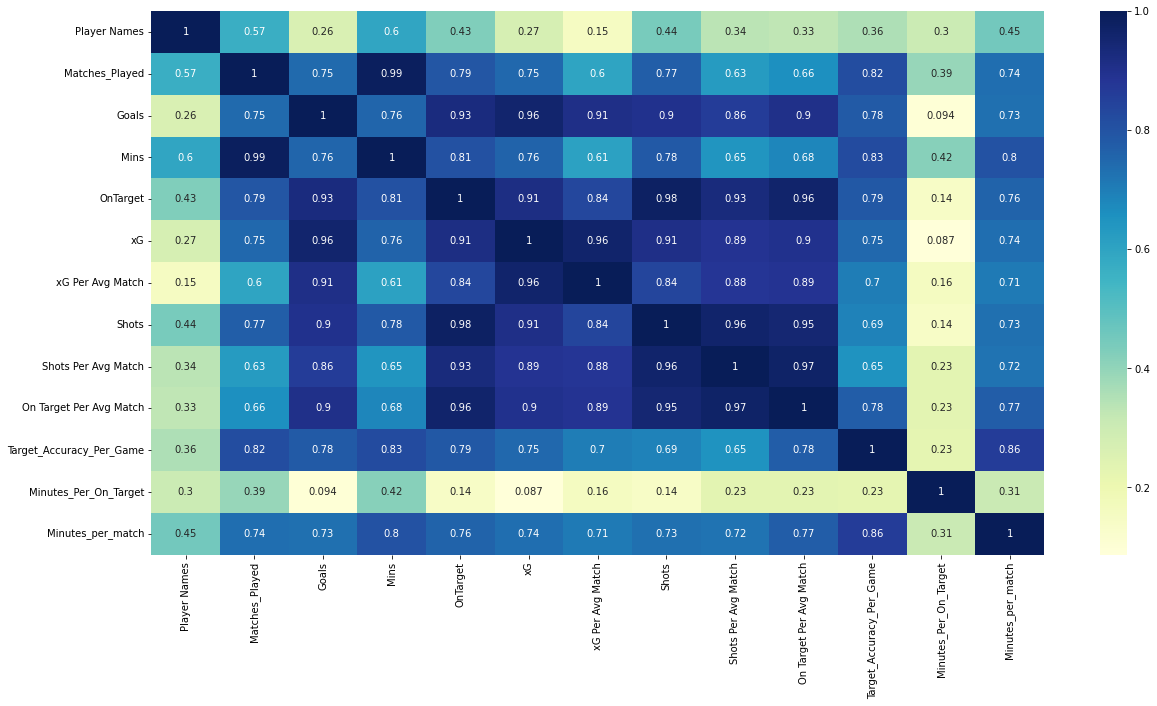

In [63]:
plt.figure(figsize=[20,10])
data = traindata.corr()
sns.heatmap(traindata.corr().abs(),annot=True,cmap="YlGnBu")
plt.show()

### Univariate Feature Selection
* The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.
* chi-squared (chi²) statistical test for non-negative features to select 12 of the best features.

In [64]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']
featureScores.nlargest(12,'Score').reset_index(drop= True)

Features        Score
0                       Mins  2701.140793
1                      Shots   733.288574
2                   OnTarget   473.639017
3      Minutes_Per_On_Target   301.498585
4                         xG   181.089171
5               Player Names   138.787040
6               Substitution    88.953891
7   Target_Accuracy_Per_Game    34.483859
8             Matches_Played    33.201118
9          Minutes_per_match    32.013959
10       Shots Per Avg Match    14.406171
11   On Target Per Avg Match    10.282873

### Removing Non-Important Features

In [65]:
X_Train = x_train.drop(["Country","Stats_Frequency","Year","League","Club","Minutes_Per_On_Target"],axis=1)
X_CV = x_cv.drop(["Country","Stats_Frequency","Year","League","Club","Minutes_Per_On_Target"],axis=1)
X_Test = x_test.drop(["Country","Stats_Frequency","Year","League","Club","Minutes_Per_On_Target"],axis=1)

## Modeling
#### Here we will be comparing out result with different machine learning models, and will select the best predicted model
* Linear Regression
* Decision Tree Regression
* Random Forest Regression
* Extreme Gradient Boost Regression

In [66]:
MAE_Score = []
MAE_Score2 = []
R2_Score = []
R2_Score2 = []
Algorithm = []

### Linear Regression

In [67]:
regressor = LinearRegression()
regressor.fit(X_Train, y_train)

Algorithm.append('LinearRegression')
features=pd.get_dummies(X_Train,drop_first=True)
feature_importance=pd.DataFrame({'feature':list(features.columns),'feature_importance':[abs(i) for i in regressor.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False).reset_index(drop= True)

feature  feature_importance
0           xG Per Avg Match           17.132699
1    On Target Per Avg Match            7.813413
2                         xG            1.355404
3        Shots Per Avg Match            0.800582
4                   OnTarget            0.151866
5             Matches_Played            0.098097
6          Minutes_per_match            0.036707
7               Player Names            0.031016
8   Target_Accuracy_Per_Game            0.022945
9               Substitution            0.003888
10                      Mins            0.000838
11                     Shots            0.000329

In [68]:
predicted= regressor.predict(X_CV)

R2_Score.append(round(sm.r2_score(y_cv, predicted), 2))
MAE_Score.append(round(sm.mean_absolute_error(y_cv, predicted), 2))

In [69]:
predicted= regressor.predict(X_Train)

R2_Score2.append(round(sm.r2_score(y_train, predicted), 2))
MAE_Score2.append(round(sm.mean_absolute_error(y_train, predicted), 2))

### Decision Tree Regression

In [70]:
regressor_dt = DecisionTreeRegressor()
regressor_dt.fit(X_Train, y_train)

Algorithm.append('DecisionTreeRegression') 
features=pd.get_dummies(X_Train,drop_first=True)
feature_importances=pd.DataFrame({'features':features.columns,'feature_importance':regressor_dt.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False).reset_index(drop=True)

features  feature_importance
0                         xG            0.742204
1    On Target Per Avg Match            0.071994
2               Player Names            0.043506
3          Minutes_per_match            0.031689
4           xG Per Avg Match            0.030796
5                   OnTarget            0.026536
6   Target_Accuracy_Per_Game            0.026234
7                       Mins            0.019671
8                      Shots            0.005223
9             Matches_Played            0.001498
10       Shots Per Avg Match            0.000477
11              Substitution            0.000171

In [71]:
predicted_dt= regressor_dt.predict(X_CV)

R2_Score.append(round(sm.r2_score(y_cv, predicted_dt), 2))
MAE_Score.append(round(sm.mean_absolute_error(y_cv, predicted_dt), 2))

In [72]:
predicted_dt= regressor_dt.predict(X_Train)

R2_Score2.append(round(sm.r2_score(y_train, predicted_dt), 2))
MAE_Score2.append(round(sm.mean_absolute_error(y_train, predicted_dt), 2))

### Random Forest Regression

In [73]:
regressor_rf = RandomForestRegressor(max_depth=100, max_features=10, min_samples_split=11)
regressor_rf.fit(X_Train, y_train)

Algorithm.append('RandomForestRegressor')
features=pd.get_dummies(X_Train,drop_first=True)
feature_importances=pd.DataFrame({'features':features.columns,'feature_importance':regressor_rf.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False).reset_index(drop=True)

features  feature_importance
0                         xG            0.666903
1                   OnTarget            0.147566
2           xG Per Avg Match            0.061593
3    On Target Per Avg Match            0.031384
4   Target_Accuracy_Per_Game            0.021954
5                       Mins            0.017114
6                      Shots            0.013728
7        Shots Per Avg Match            0.012394
8          Minutes_per_match            0.011371
9               Substitution            0.007446
10            Matches_Played            0.004295
11              Player Names            0.004254

In [74]:
predicted_rf = regressor_rf.predict(X_CV)

R2_Score.append(round(sm.r2_score(y_cv, predicted_rf), 2))
MAE_Score.append(round(sm.mean_absolute_error(y_cv, predicted_rf), 2))

In [75]:
predicted_rf = regressor_rf.predict(X_Train)

R2_Score2.append(round(sm.r2_score(y_train, predicted_rf), 2))
MAE_Score2.append(round(sm.mean_absolute_error(y_train, predicted_rf), 2))

### XGBoost or Extreme Gradient Boost Regression

In [76]:
regressor = xgb.XGBRegressor(booster='gbtree', colsample_bytree=0.4, learning_rate=0.112, max_depth=11, n_estimators=180)
regressor.fit(X_Train, y_train)

Algorithm.append('XGB Regressor')
features=pd.get_dummies(X_Train,drop_first=True)
feature_importances=pd.DataFrame({'features':features.columns,'feature_importance':regressor.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False).reset_index(drop=True)

features  feature_importance
0                         xG            0.274528
1                   OnTarget            0.261609
2           xG Per Avg Match            0.163429
3    On Target Per Avg Match            0.155497
4        Shots Per Avg Match            0.051281
5                       Mins            0.023832
6   Target_Accuracy_Per_Game            0.015835
7          Minutes_per_match            0.015015
8                      Shots            0.014892
9             Matches_Played            0.011051
10              Substitution            0.006828
11              Player Names            0.006203

In [77]:
predicted = regressor.predict(X_CV)

R2_Score.append(round(sm.r2_score(y_cv, predicted), 2))
MAE_Score.append(round(sm.mean_absolute_error(y_cv, predicted), 2))

In [78]:
predicted = regressor.predict(X_Train)

R2_Score2.append(round(sm.r2_score(y_train, predicted), 2))
MAE_Score2.append(round(sm.mean_absolute_error(y_train, predicted), 2))

## Comparison list

In [79]:
comp = pd.DataFrame(list(zip(Algorithm, MAE_Score2, R2_Score2, MAE_Score, R2_Score)), columns =['Algorithm', 'MAE_Score_Train', 'R2_Score_Train', 'MAE_Score_CV', 'R2_Score_CV']) 
print(tabulate(comp, headers = 'keys', tablefmt = 'psql'))

+----+------------------------+-------------------+------------------+----------------+---------------+
|    | Algorithm              |   MAE_Score_Train |   R2_Score_Train |   MAE_Score_CV |   R2_Score_CV |
|----+------------------------+-------------------+------------------+----------------+---------------|
|  0 | LinearRegression       |              2.32 |             0.79 |           2.59 |          0.82 |
|  1 | DecisionTreeRegression |              0    |             1    |           3.72 |          0.49 |
|  2 | RandomForestRegressor  |              1.58 |             0.9  |           2.77 |          0.76 |
|  3 | XGB Regressor          |              0    |             1    |           2.57 |          0.78 |
+----+------------------------+-------------------+------------------+----------------+---------------+


## Predicting y_test using XG-Boost

In [80]:
final_result = regressor.predict(X_Test)
final_result

array([11.559833 , 11.614788 , 10.87383  , 10.917807 , 11.10449  ,
       11.002776 , 12.807641 , 11.333545 , 10.522798 , 12.475788 ,
       10.365153 , 11.316808 , 11.364624 , 11.8425865, 11.209154 ,
       10.771842 , 13.34443  , 11.123476 , 10.891065 , 12.501432 ,
       13.285657 , 12.115884 , 11.974286 , 10.9182005], dtype=float32)

In [81]:
Final_Result=final_result.round(0).astype(int)
Final_Result

array([12, 12, 11, 11, 11, 11, 13, 11, 11, 12, 10, 11, 11, 12, 11, 11, 13,
       11, 11, 13, 13, 12, 12, 11])

In [82]:
type(Final_Result)

numpy.ndarray

### We will make the Final_Result as dataframe, with a column name "Goals"

In [83]:
Final_Result = pd.DataFrame(Final_Result,columns=['Goals'])

### Display the "Goals" column

In [84]:
Final_Result.head()

Goals
0     12
1     12
2     11
3     11
4     11

In [85]:
Final = X_test.merge(Final_Result , on=X_test.index)

In [86]:
Final["Minutes_per_goal"] = (Final['Mins']/Final['Goals'])
Final.drop("key_0",axis=1,inplace=True)

### Display column names for all the DataFrames: [Train, CV, Test]

In [87]:
Final.columns

Index(['Country', 'League', 'Club', 'Player Names', 'Matches_Played',
       'Substitution', 'Mins', 'xG', 'xG Per Avg Match', 'Shots', 'OnTarget',
       'Shots Per Avg Match', 'On Target Per Avg Match', 'Year',
       'Stats_Frequency', 'Target_Accuracy_Per_Game', 'Minutes_Per_On_Target',
       'Minutes_per_match', 'Goals', 'Minutes_per_goal'],
      dtype='object')

In [88]:
Traindata.columns

Index(['Country', 'League', 'Club', 'Player Names', 'Matches_Played',
       'Substitution', 'Mins', 'Goals', 'xG', 'xG Per Avg Match', 'Shots',
       'OnTarget', 'Shots Per Avg Match', 'On Target Per Avg Match', 'Year',
       'Stats_Frequency', 'Target_Accuracy_Per_Game', 'Minutes_Per_On_Target',
       'Minutes_per_match', 'Minutes_per_goal'],
      dtype='object')

In [89]:
cvdata.columns

Index(['Country', 'League', 'Club', 'Player Names', 'Matches_Played',
       'Substitution', 'Mins', 'Goals', 'xG', 'xG Per Avg Match', 'Shots',
       'OnTarget', 'Shots Per Avg Match', 'On Target Per Avg Match', 'Year',
       'Stats_Frequency', 'Target_Accuracy_Per_Game', 'Minutes_Per_On_Target',
       'Minutes_per_match', 'Minutes_per_goal'],
      dtype='object')

### Merging all the DataFrames into a single DataFrame

In [90]:
Final_Result=pd.concat([Traindata, cvdata], axis=0)
Final_Result=pd.concat([Final_Result, Final], axis=0)
Final_Result

Country          League   Club       Player Names  Matches_Played  \
0     Spain         La Liga  (BAR)  Antoine Griezmann              36   
1     Spain         La Liga  (ATL)        Luis Suarez              34   
2     Spain         La Liga  (JUV)  Cristiano Ronaldo              29   
3     Spain         La Liga  (RMA)      Karim Benzema              23   
4     Spain         La Liga  (PSG)             Neymar              30   
..      ...             ...    ...                ...             ...   
19  England  Premier League  (LIV)      Mohamed Salah               9   
20  England  Premier League  (LEI)        Jamie Vardy               8   
21  England  Premier League  (TOT)         Harry Kane              10   
22  England  Premier League  (LIV)         Sadio Mane               8   
23  England  Premier League  (TOT)      Son Heung-Min              10   

    Substitution  Mins  Goals     xG  xG Per Avg Match  Shots  OnTarget  \
0              0  3129   16.0  11.86              0.36     88        41   
1              1  2940   28.0  23.21              0.75    120        57   
2              0  2634   25.0  24.68              0.89    162        60   
3              6  1967   11.0  13.25              0.64     69        34   
4              0  2694   13.0  13.33              0.47    105        42   
..           ...   ...    ...    ...               ...    ...       ...   
19             0   831   13.0   6.12              0.70     35        15   
20             1   780   13.0   8.70              1.06     21        15   
21             0   956   12.0   6.64              0.66     39        15   
22             1   785   12.0   4.88              0.59     27        13   
23             0   861   11.0   3.90              0.43     20        12   

    Shots Per Avg Match  On Target Per Avg Match  Year  Stats_Frequency  \
0                  2.67                     1.24  2016                3   
1                  3.88                     1.84  2016                4   
2                  5.84                     2.16  2016                4   
3                  3.33                     1.64  2016                3   
4                  3.70                     1.48  2016                3   
..                  ...                      ...   ...              ...   
19                 4.00                     1.71  2020                3   
20                 2.56                     1.83  2020                3   
21                 3.88                     1.49  2020                3   
22                 3.27                     1.57  2020                3   
23                 2.21                     1.32  2020                3   

    Target_Accuracy_Per_Game  Minutes_Per_On_Target  Minutes_per_match  \
0                  46.441948              76.317073          86.916667   
1                  47.422680              51.578947          86.470588   
2                  36.986301              43.900000          90.827586   
3                  49.249249              57.852941          85.521739   
4                  40.000000              64.142857          89.800000   
..                       ...                    ...                ...   
19                 42.750000              55.400000          92.333333   
20                 71.484375              52.000000          97.500000   
21                 38.402062              63.733333          95.600000   
22                 48.012232              60.384615          98.125000   
23                 59.728507              71.750000          86.100000   

    Minutes_per_goal  
0         195.562500  
1         105.000000  
2         105.360000  
3         178.818182  
4         207.230769  
..               ...  
19         63.923077  
20         60.000000  
21         79.666667  
22         65.416667  
23         78.272727  

[142 rows x 20 columns]

In [91]:
px.scatter(Final_Result, x="Goals", y="xG", animation_frame="Year", animation_group="Mins",
           size="Matches_Played", color="Player Names")

## Who will be Crowned the Best Player?
#### We Have decided 6 "Features" and their importance, to decide the "Best Player".

In [92]:
dict1 = {'Feature':["Goals", "Minutes per On-Target Shot", "Shots on Goal", "Minutes per Goal", "Goals-xG Score", "Target Accuracy"],
        'Factor': [20, 5, 2, 10, 12, 6],
        'Max Score':[100, 25, 10, 50, 60, 30]}
  
Points = pd.DataFrame(dict1, index=[1,2,3,4,5,6])
Points

Feature  Factor  Max Score
1                       Goals      20        100
2  Minutes per On-Target Shot       5         25
3               Shots on Goal       2         10
4            Minutes per Goal      10         50
5              Goals-xG Score      12         60
6             Target Accuracy       6         30

### 1. Goals

In [93]:
fig = go.Figure(go.Bar(
            x=Final_Result['Goals'],
            y=Final_Result['Player Names'],
            marker=dict(color = [10*i for i in range(1,len(Traindata['Mins']))],
                     colorscale='blues'),#ylgnbu 
            orientation='h'))

fig.update_traces(marker_line_width=1.5)
fig.show()

#### Goal Winner : 1. Lionel Messi (5pts)
2. Robert Lewandowski (4pts)
3. Cristiano Ronaldo (3pts)
4. Ciro Immobile (2pts)
5. Luis Suarez (1pt)

In [94]:
dict2 = {'Player Names':["Lionel Messi", "Robert Lewandowski", "Cristiano Ronaldo", "Ciro Immobile", "Luis Suarez"],
        'Goals': [100, 80, 60, 40, 20],
       }
  
Goal_Score = pd.DataFrame(dict2, index=[1,2,3,4,5])
Goal_Score

Player Names  Goals
1        Lionel Messi    100
2  Robert Lewandowski     80
3   Cristiano Ronaldo     60
4       Ciro Immobile     40
5         Luis Suarez     20

### 2. Minutes per On Target Shot

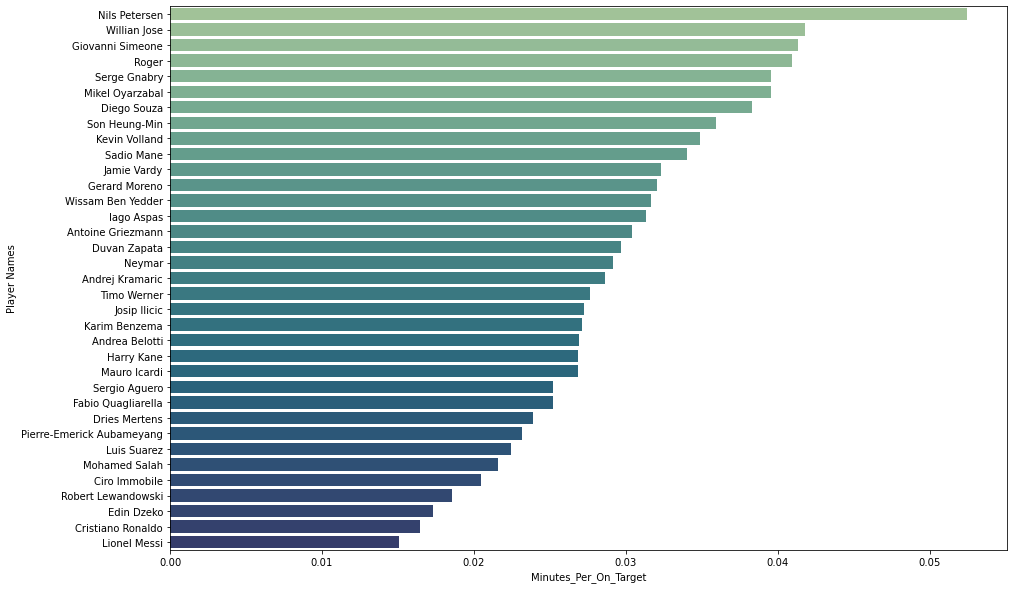

In [95]:
df_top_by_mins_shot = Final_Result.sort_values(by=['Minutes_Per_On_Target'], ascending=False)
df_top_by_mins_shot = df_top_by_mins_shot.groupby(by = ["Player Names"])["Minutes_Per_On_Target",'Mins'].sum().reset_index()
df_top_by_mins_shot["Minutes_Per_On_Target"] = df_top_by_mins_shot["Minutes_Per_On_Target"]/df_top_by_mins_shot["Mins"]
df_top_by_mins_shot = df_top_by_mins_shot.sort_values(by=['Minutes_Per_On_Target'], ascending=False)


plt.figure(figsize = (15,10))
sns.barplot(x='Minutes_Per_On_Target', y='Player Names', data=df_top_by_mins_shot, palette="crest", ci=None)
plt.show()

#### Minutes Per On-Target Shot Winner : 1. Lionel Messi (5pts)
2. Cristiano Ronaldo (4pts)
3. Edin Dzeko (3pts)
4. Robert Lewandowski (2pts)
5. Ciro Immobile (1pt)

In [96]:
dict3 = {'Player Names':["Lionel Messi", "Cristiano Ronaldo", "Edin Dzeko", "Robert Lewandowski", "Ciro Immobile"],
        'Min per On-Target': [25, 20, 15, 10, 5],
       }

M_T_Score = pd.DataFrame(dict3, index=[1,2,3,4,5])
M_T_Score

Player Names  Min per On-Target
1        Lionel Messi                 25
2   Cristiano Ronaldo                 20
3          Edin Dzeko                 15
4  Robert Lewandowski                 10
5       Ciro Immobile                  5

### 3. Shots on Goal per Matches Played

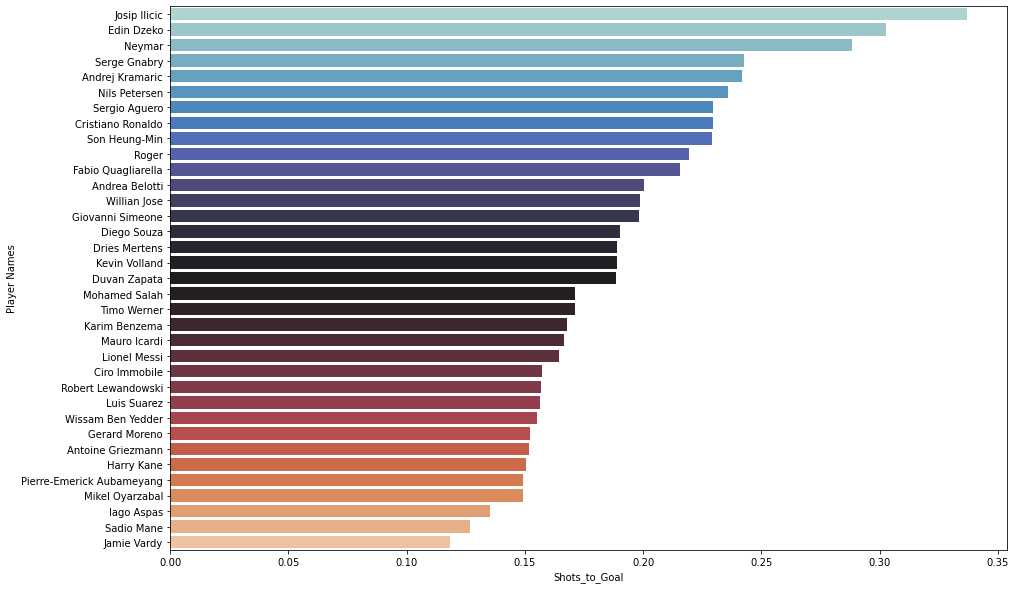

In [97]:
df_Shots_to_Goal = df.sort_values(by=['Shots_to_Goal'], ascending=False)
df_Shots_to_Goal = df_Shots_to_Goal.groupby(by = ["Player Names"])["Shots_to_Goal",'Matches_Played'].sum().reset_index()
df_Shots_to_Goal["Shots_to_Goal"] = df_Shots_to_Goal["Shots_to_Goal"]/df_Shots_to_Goal["Matches_Played"]
df_Shots_to_Goal = df_Shots_to_Goal.sort_values(by=['Shots_to_Goal'], ascending=False)


plt.figure(figsize = (15,10))
sns.barplot(x='Shots_to_Goal', y='Player Names', data=df_Shots_to_Goal, palette="icefire", ci=None)
plt.show()

#### Shots on Goal Winner : 1. Josip Ilicic (5pts)
2. Edin Dzeko (4pts)
3. Neymar (3pts)
4. Serge Gnabry (2pts)
5. Andrej Kramaric (1pt)

In [98]:
dict4 = {'Player Names':["Josip Ilicic", "Edin Dzeko", "Neymar", "Serge Gnabry", "Andrej Kramaric"],
        'Shots on Goal': [10, 8, 6, 4, 2],
       }

S_G_Score = pd.DataFrame(dict4, index=[1,2,3,4,5])
S_G_Score

Player Names  Shots on Goal
1     Josip Ilicic             10
2       Edin Dzeko              8
3           Neymar              6
4     Serge Gnabry              4
5  Andrej Kramaric              2

### 4. Minutes per Goal

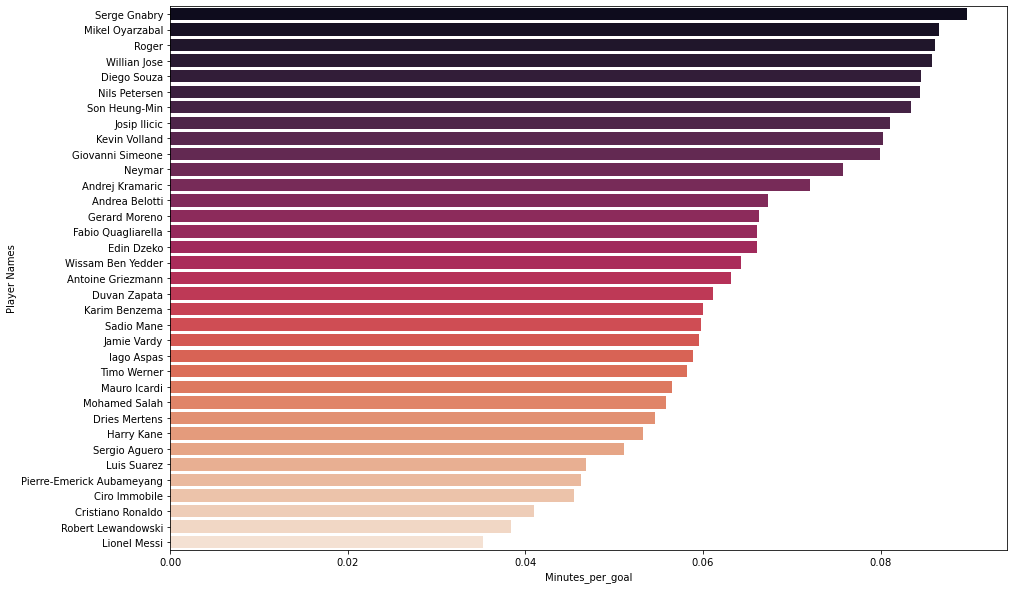

In [99]:
df_Minutes_per_goal = Final_Result.sort_values(by=['Minutes_per_goal'], ascending=False)
df_Minutes_per_goal = df_Minutes_per_goal.groupby(by = ["Player Names"])["Minutes_per_goal",'Mins'].sum().reset_index()
df_Minutes_per_goal["Minutes_per_goal"] = df_Minutes_per_goal["Minutes_per_goal"]/df_Minutes_per_goal["Mins"]
df_Minutes_per_goal = df_Minutes_per_goal.sort_values(by=['Minutes_per_goal'], ascending=False)


plt.figure(figsize = (15,10))
sns.barplot(x='Minutes_per_goal', y='Player Names', data=df_Minutes_per_goal, palette="rocket", ci=None)
plt.show()

#### Minutes per Goal Winner : 1. Lionel Messi (5pts)
2. Robert Lewandowski (4pts)
3. Cristiano Ronaldo (3pts)
4. Ciro Immobile (2pts)
5. Pierre-Emerick Aubameyang (1pt)

In [100]:
dict5 = {'Player Names':["Lionel Messi", "Robert Lewandowski", "Cristiano Ronaldo", "Ciro Immobile", "Pierre-Emerick Aubameyang"],
        'Min per Goal': [50, 40, 30, 20, 10],
       }

M_G_Score = pd.DataFrame(dict5, index=[1,2,3,4,5])
M_G_Score

Player Names  Min per Goal
1               Lionel Messi            50
2         Robert Lewandowski            40
3          Cristiano Ronaldo            30
4              Ciro Immobile            20
5  Pierre-Emerick Aubameyang            10

### 5. Goals-xG Score

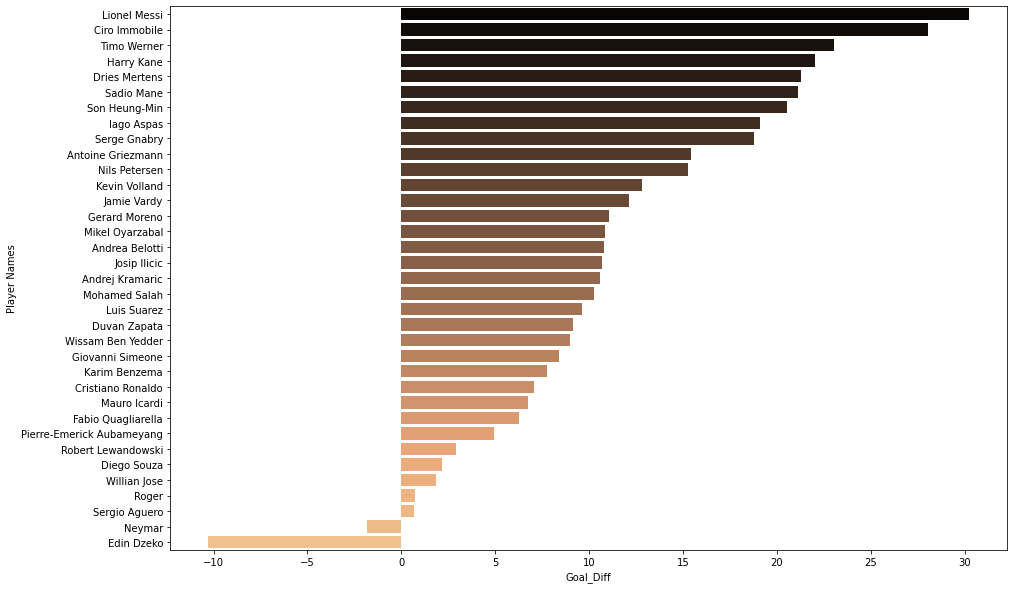

In [101]:
Final_Result["Goal_Diff"]=Final_Result["Goals"]-Final_Result["xG"]
df_diff = Final_Result.sort_values(by=['Goal_Diff'], ascending=False)
df_diff = df_diff.groupby(by = ["Player Names"])["Goal_Diff"].sum().reset_index()
df_diff = df_diff.sort_values(by=['Goal_Diff'], ascending=False)


plt.figure(figsize = (15,10))
sns.barplot(x='Goal_Diff', y='Player Names', data=df_diff, palette="copper", ci=None)
plt.show()

#### Goals-xG Score Winner : 1. Lionel Messi (5pts)
2. Ciro Immobile (4pts)
3. Dries Mertens (3pts)
4. Timo Werner (2pts)
5. Harry Kane (1pt)

In [102]:
dict6 = {'Player Names':["Lionel Messi", "Ciro Immobile", "Dries Mertens", "Timo Werner", "Harry Kane"],
        'Goals-xG': [60, 48, 36, 24, 12],
       }

GD_Score = pd.DataFrame(dict6, index=[1,2,3,4,5])
GD_Score

Player Names  Goals-xG
1   Lionel Messi        60
2  Ciro Immobile        48
3  Dries Mertens        36
4    Timo Werner        24
5     Harry Kane        12

### 6. Target Accuracy per Game

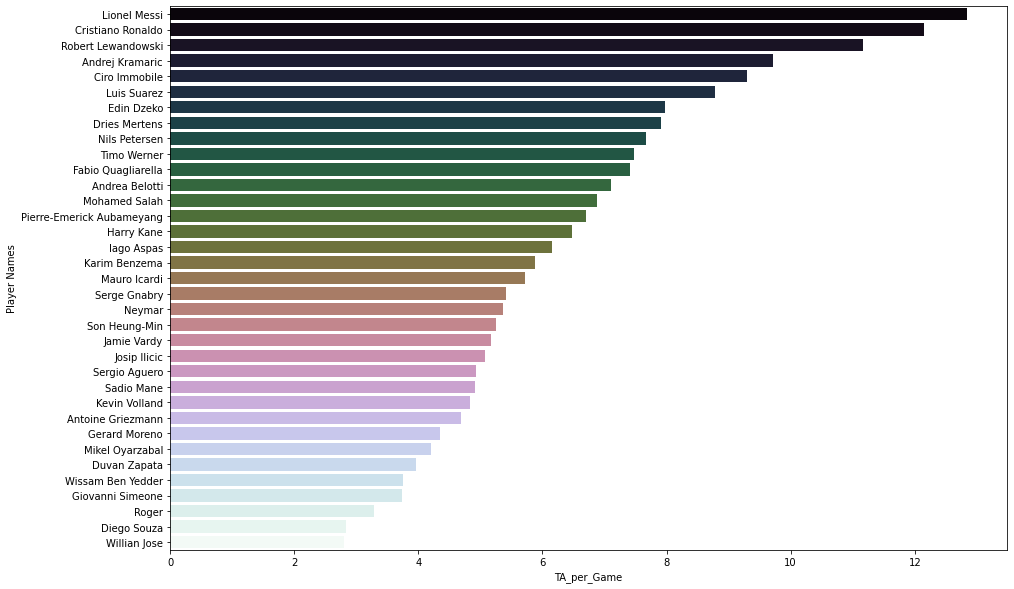

In [103]:
df_TA = Final_Result[["Player Names","OnTarget","Matches_Played"]]
df_TA["TA_per_Game"] = df_TA["OnTarget"]/df_TA["Matches_Played"]
df_TA = df_TA.groupby(by = ["Player Names"])["TA_per_Game"].sum().reset_index()
df_TA = df_TA.sort_values(by=['TA_per_Game'], ascending=False)


plt.figure(figsize = (15,10))
sns.barplot(x='TA_per_Game', y='Player Names', data=df_TA, palette="cubehelix", ci=None)
plt.show()

#### Target Accuracy per Game Winner : 1. Lionel Messi (5pts)
2. Cristiano Ronaldo (4pts)
3. Robert Lewandowski (3pts)
4. Andrej Kramaric (2pts)
5. Ciro Immobile (1pt)

In [104]:
dict7 = {'Player Names':["Lionel Messi", "Cristiano Ronaldo", "Robert Lewandowski", "Andrej Kramaric", "Ciro Immobile"],
        'Accuracy per Game': [20, 16, 12, 8, 4],
       }

TApG_Score = pd.DataFrame(dict7, index=[1,2,3,4,5])
TApG_Score

Player Names  Accuracy per Game
1        Lionel Messi                 20
2   Cristiano Ronaldo                 16
3  Robert Lewandowski                 12
4     Andrej Kramaric                  8
5       Ciro Immobile                  4

## Result Prediction

In [105]:
Final_Score = pd.merge(Goal_Score,M_T_Score,how='outer',on='Player Names')
Final_Score = pd.merge(Final_Score,S_G_Score,how='outer',on='Player Names')
Final_Score = pd.merge(Final_Score,M_G_Score,how='outer',on='Player Names')
Final_Score = pd.merge(Final_Score,GD_Score,how='outer',on='Player Names')
Final_Score = pd.merge(Final_Score,TApG_Score,how='outer',on='Player Names')
Final_Score = Final_Score.fillna(0)
Final_Score[['Goals','Min per On-Target','Shots on Goal','Min per Goal','Goals-xG','Accuracy per Game']] = Final_Score[['Goals','Min per On-Target','Shots on Goal','Min per Goal','Goals-xG','Accuracy per Game']].astype(int)
Final_Score = Final_Score.set_index(Final_Score.index+1)

In [106]:
Final_Score
X=Final_Score.T
Total_Score = X.iloc[1:].sum()
Final_Score["Total Score"] = Total_Score
Final_Score = Final_Score.sort_values("Total Score", ascending=False)
Final_Score.reset_index(drop=True,inplace=True)
Final_Score = Final_Score.set_index(Final_Score.index+1)

In [107]:
dict8 = {'Player Names':["Lionel Messi", "Robert Lewandowski", "Cristiano Ronaldo", "Ciro Immobile", "Dries Mertens",
                        "Lionel Messi", "Robert Lewandowski", "Cristiano Ronaldo", "Ciro Immobile", "Dries Mertens",
                        "Lionel Messi", "Robert Lewandowski", "Cristiano Ronaldo", "Ciro Immobile", "Dries Mertens",
                        "Lionel Messi", "Robert Lewandowski", "Cristiano Ronaldo", "Ciro Immobile", "Dries Mertens",
                        "Lionel Messi", "Robert Lewandowski", "Cristiano Ronaldo", "Ciro Immobile", "Dries Mertens",
                        "Lionel Messi", "Robert Lewandowski", "Cristiano Ronaldo", "Ciro Immobile", "Dries Mertens",
                        "Lionel Messi", "Robert Lewandowski", "Cristiano Ronaldo", "Ciro Immobile", "Dries Mertens"],
         
        'Points': [100, 80, 60, 40, 0,
                  25, 10, 20, 5, 0,
                   0, 0, 0, 0, 0, 
                   50, 40, 30, 20, 0,
                   60, 0, 0, 48, 36,
                   20, 12, 16, 4, 0,
                  255, 142, 126, 117, 36],
         
         'Features': ["Goals","Goals","Goals","Goals","Goals",
                     "Min per On-Target","Min per On-Target","Min per On-Target","Min per On-Target","Min per On-Target",
                     "Shots on Goal","Shots on Goal","Shots on Goal","Shots on Goal","Shots on Goal",
                     "Min per Goal","Min per Goal","Min per Goal","Min per Goal","Min per Goal",
                     "Goals-xG","Goals-xG","Goals-xG","Goals-xG","Goals-xG",
                     "Accuracy per Game","Accuracy per Game","Accuracy per Game","Accuracy per Game","Accuracy per Game",
                     "Total Score","Total Score","Total Score","Total Score","Total Score"]
       }

Plot = pd.DataFrame(dict8)


## Result - [Top 5 Players]

### And the Best Award Goes to...

In [108]:
def Result(data):
    if data == "Lionel Messi":
        img = mpimg.imread('Messi.jpg')
        plt.figure(figsize = (30,18))
        print(plt.imshow(img))
    elif data == "Robert Lewandowski":
        img = mpimg.imread('Lewa.jpg')
        plt.figure(figsize = (35,17))
        print(plt.imshow(img))
    elif data == "Cristiano Ronaldo":
        img = mpimg.imread('Factos.jpeg')
        plt.figure(figsize = (20,18))
        print(plt.imshow(img))
    else: 
        img = mpimg.imread('2019-Ballon-dOr.jpg')
        plt.figure(figsize = (20,18))
        print(plt.imshow(img))

AxesImage(270,162;1674x978.48)


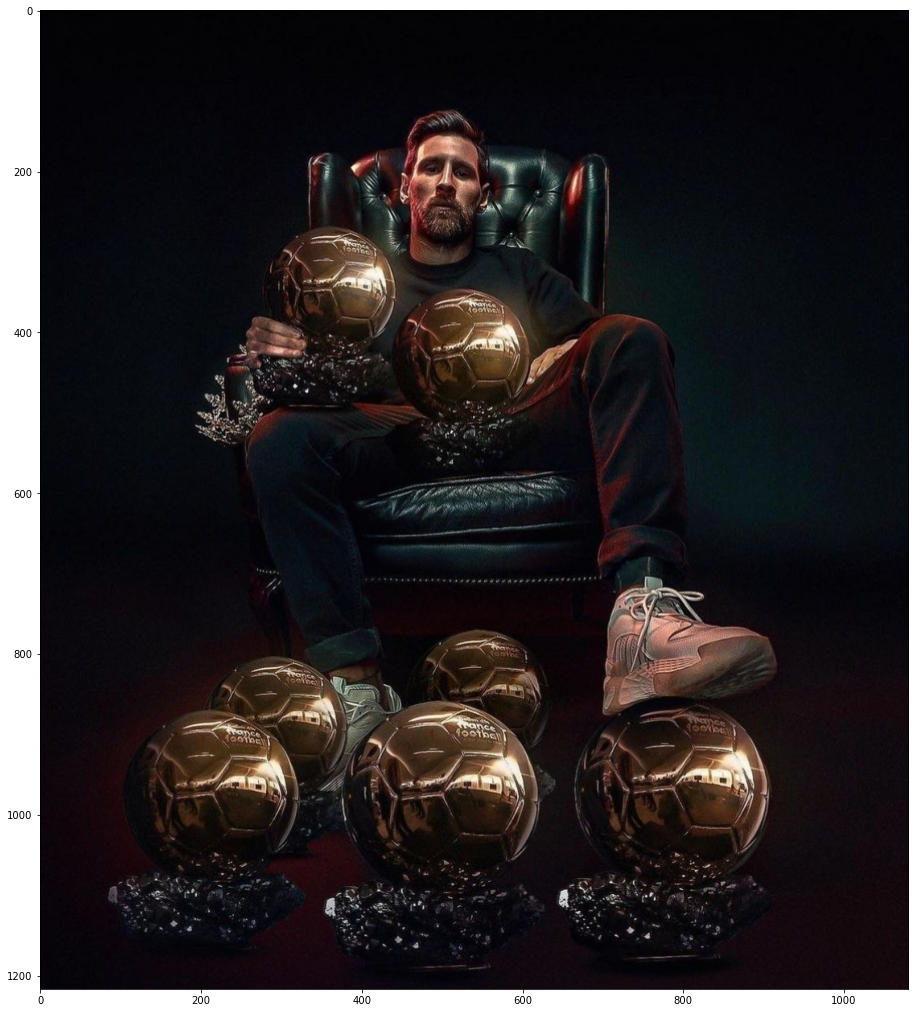

In [109]:
Result(Final_Score['Player Names'].iloc[0])

In [110]:
Final_Score.head()

Player Names  Goals  Min per On-Target  Shots on Goal  Min per Goal  \
1        Lionel Messi    100                 25              0            50   
2  Robert Lewandowski     80                 10              0            40   
3   Cristiano Ronaldo     60                 20              0            30   
4       Ciro Immobile     40                  5              0            20   
5       Dries Mertens      0                  0              0             0   

   Goals-xG  Accuracy per Game Total Score  
1        60                 20         255  
2         0                 12         142  
3         0                 16         126  
4        48                  4         117  
5        36                  0          36

In [111]:
fig = px.line(Plot, x="Features", y="Points", color='Player Names',symbol="Player Names")
fig.show()

### 1.Lionel Messi [255 / 275]: Factos 👍👀
2. Robert Lewandowski [142 / 275]
3. Cristiano Ronaldo [126 / 275]
4. Ciro Immobile [117 / 275]
5. Andrej Kramaric [36 / 275]